## Data Cleaning and Processing:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

warnings.filterwarnings("ignore")

f = r'/Users/shubhamgaur/Desktop/NU/Sem2/DataMining/Project/flights.csv'
df = pd.read_csv(f, low_memory=False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [3]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Calculating the sum of null values in the dataframe


In [4]:
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DIVERTED', 'CANCELLED']
df.drop(columns=columns_to_drop, inplace=True)

Dropped the columns because of there was no data present in them making them irrelevant to our project

In [5]:
df.dropna(inplace=True)

Dropping rows with null values as there are maximum 105,000 rows with null values. Therefore it makes sense to drop these as we have a possible sample size of 5,000,000 rows even if we exclude the rows with null values

## Exploratory Data Analysis:

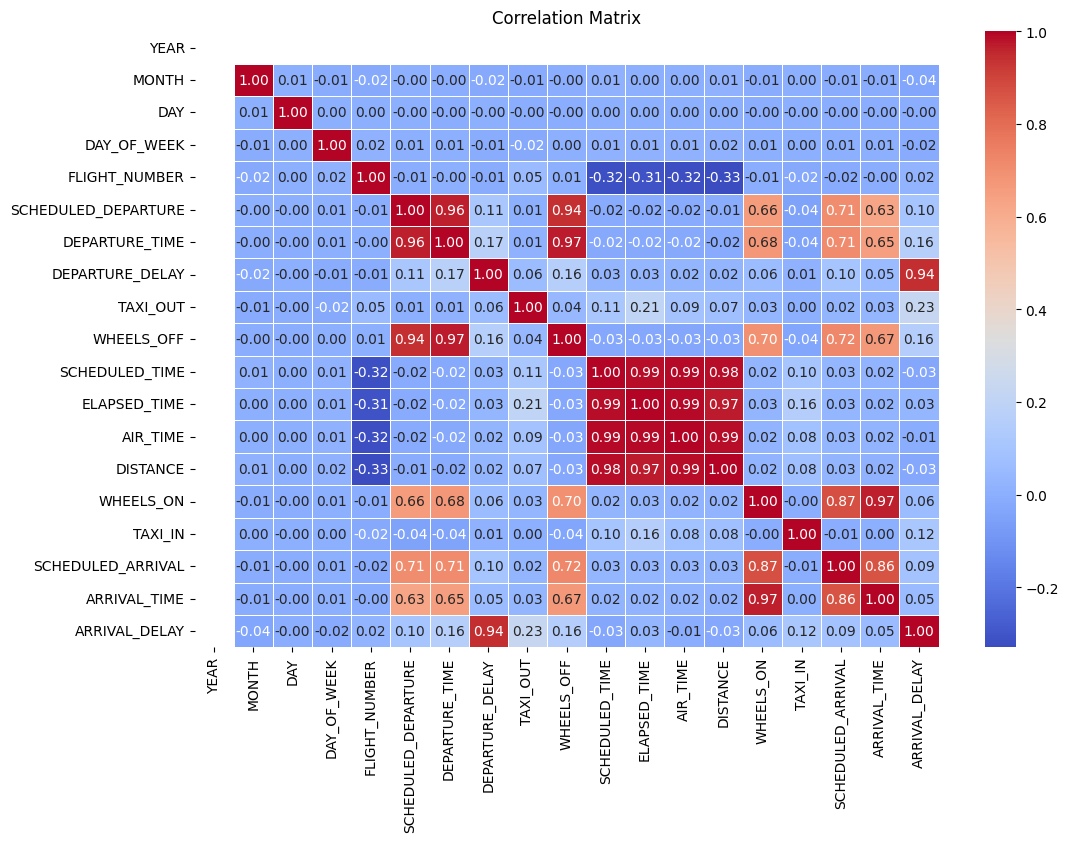

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Correlation matrix to observe the relationships between the variables and develop an understanding of the interdependencies. This help us select features for our regression and classification tasks.

In [7]:
unique_airlines = df['AIRLINE'].unique()
print("Unique Airlines:")
print(unique_airlines)


Unique Airlines:
['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'AIRLINE' column
df['AIRLINE_ENCODED'] = label_encoder.fit_transform(df['AIRLINE'])

# Get unique encoded values
unique_encoded_airlines = df['AIRLINE_ENCODED'].unique()

# Map encoded values back to original airline names
airline_mapping = dict(zip(df['AIRLINE_ENCODED'], df['AIRLINE']))

# Display unique encoded values and their corresponding airline names
print("Unique Encoded Airline Values:")
print(unique_encoded_airlines)

print("\nMapping of Encoded Values to Airline Names:")
print(airline_mapping)


Unique Encoded Airline Values:
[ 1  0 11  3  8 10  6  2  9  4  5 13  7 12]

Mapping of Encoded Values to Airline Names:
{1: 'AS', 0: 'AA', 11: 'US', 3: 'DL', 8: 'NK', 10: 'UA', 6: 'HA', 2: 'B6', 9: 'OO', 4: 'EV', 5: 'F9', 13: 'WN', 7: 'MQ', 12: 'VX'}


In [9]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIRLINE_ENCODED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,1
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,11
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,1


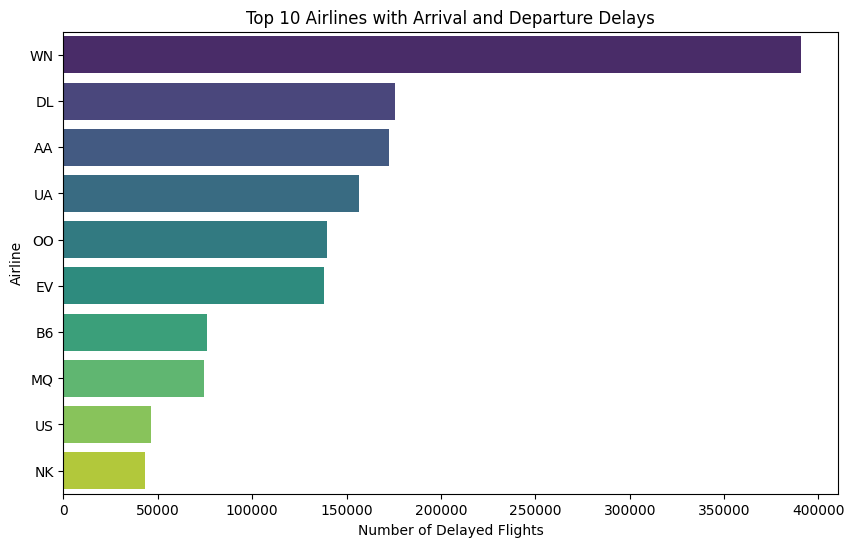

In [10]:
# Filter the DataFrame to include only rows with both arrival and departure delays
delayed_flights = df[(df['ARRIVAL_DELAY'] > 0) & (df['DEPARTURE_DELAY'] > 0)]

# Get the top 10 airlines with the most delayed flights
top_10_airlines = delayed_flights['AIRLINE'].value_counts().head(10)

# Plot the top 10 airlines with arrival and departure delays
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_airlines.values, y=top_10_airlines.index, palette='viridis')
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Airline')
plt.title('Top 10 Airlines with Arrival and Departure Delays')
plt.show()


The horizontal bar chart above shows the top 10 airlines that have maximum number of delayed flights. It shows us that some airlines have significantly larger number of delayed flights as compared to others. 

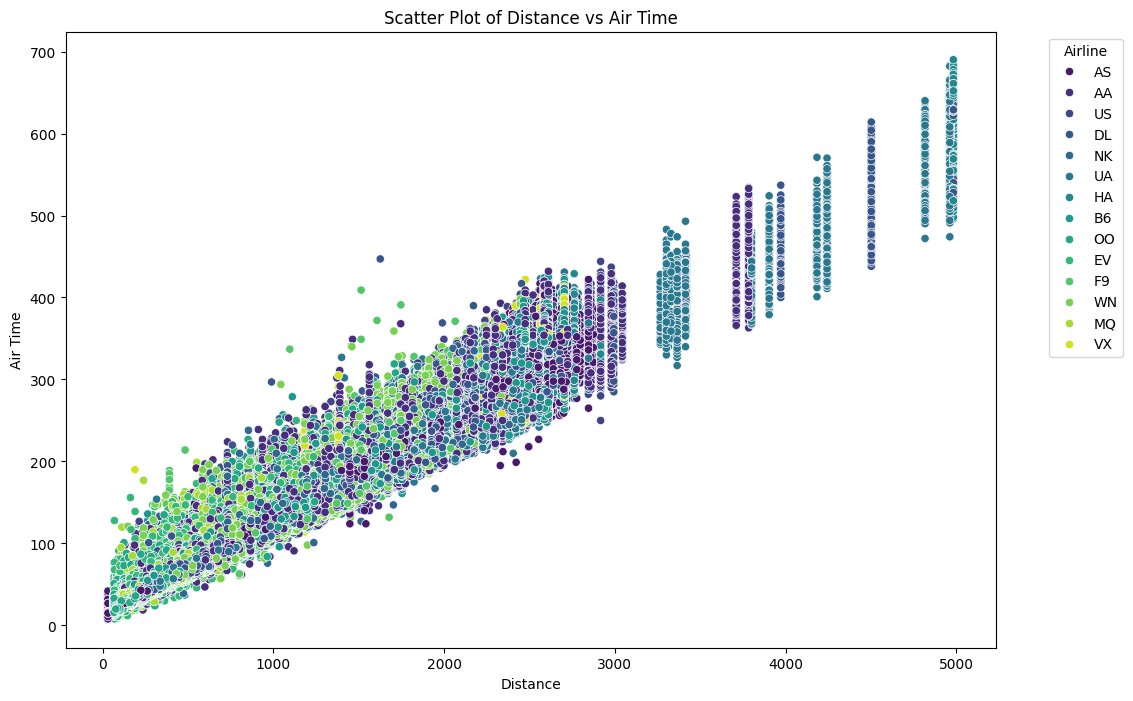

In [11]:
# Filter the DataFrame to include only rows with non-null values for 'DISTANCE' and 'AIR_TIME'
filtered_df = df.dropna(subset=['DISTANCE', 'AIR_TIME'])

# Plot scatter plot of 'DISTANCE' against 'AIR_TIME'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='DISTANCE', y='AIR_TIME', hue='AIRLINE', palette='viridis')
plt.title('Scatter Plot of Distance vs Air Time')
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The scatter plot shows a linear correlation between distance of flight and air time. More importantly it shows even distribution along the two axes for all airlines. 

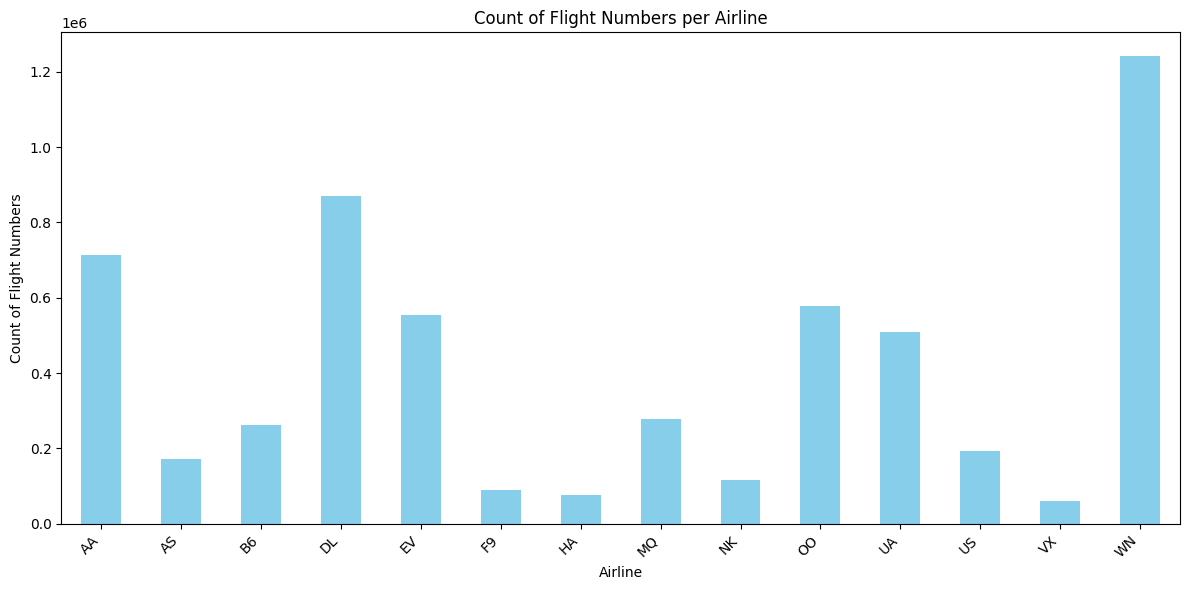

In [12]:
# Group the DataFrame by 'AIRLINE' and count the occurrences of 'FLIGHT_NUMBER'
flight_number_counts = df.groupby('AIRLINE')['FLIGHT_NUMBER'].count()

# Plot the counts
plt.figure(figsize=(12, 6))
flight_number_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Flight Numbers per Airline')
plt.xlabel('Airline')
plt.ylabel('Count of Flight Numbers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The bar chart shows the number of flights oraganised by each airline. Some airlines have offered significantly higher number of flights which might introduce some imbalance in our dataset when performing regression and classification algorithms.

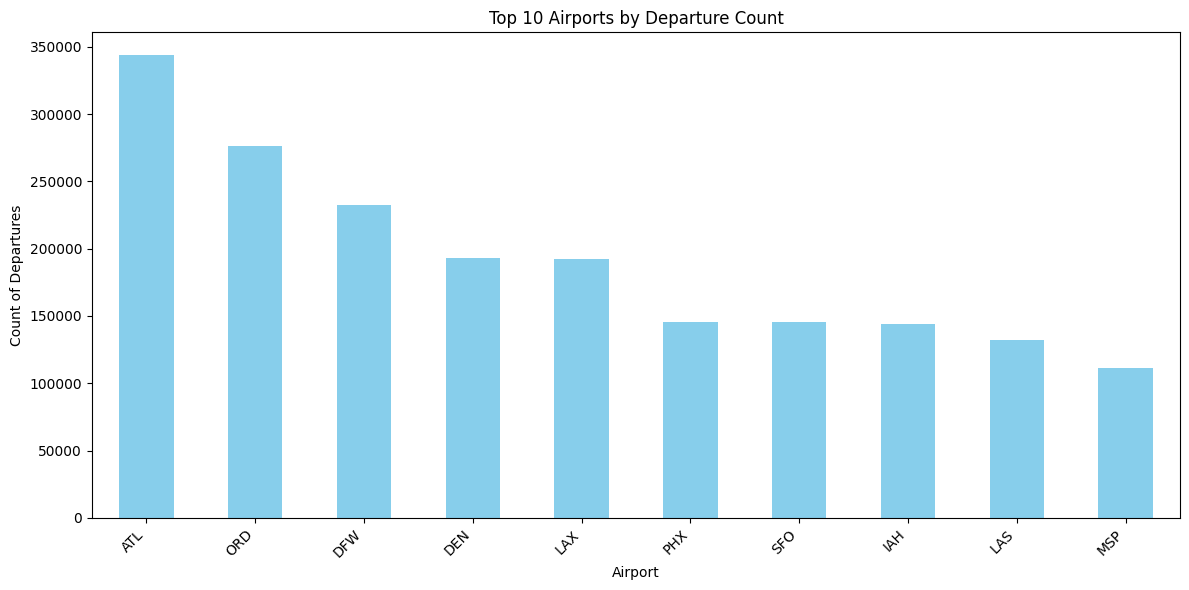

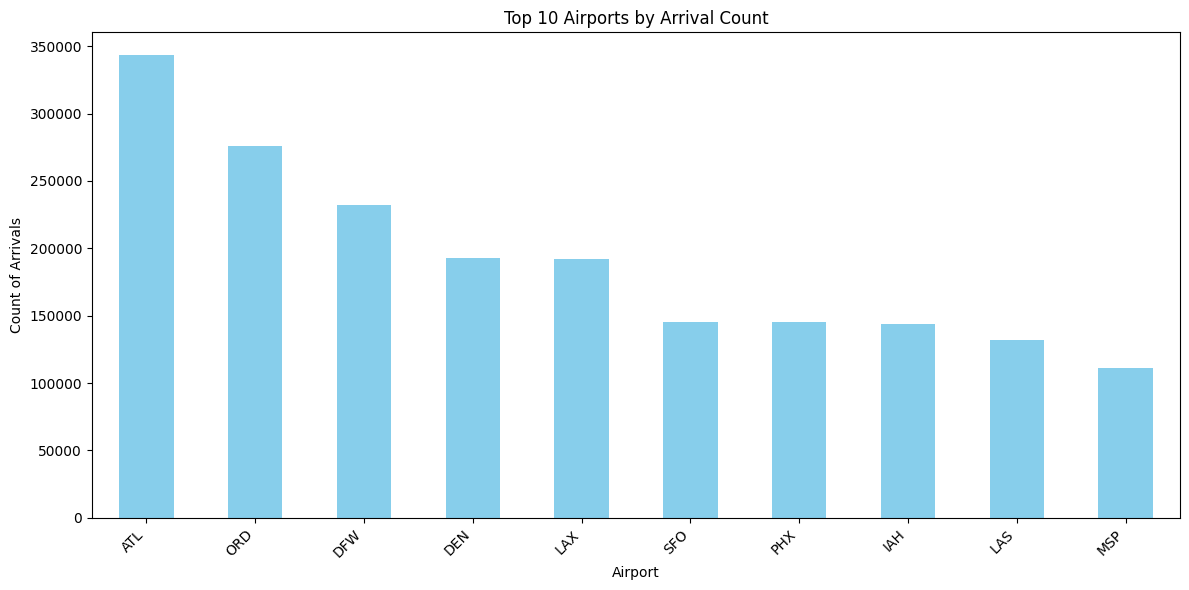

In [13]:
# Get the top 10 airports by the count of flights departing from each airport
top_10_departure_airports = df['ORIGIN_AIRPORT'].value_counts().head(10)

# Plot counts of flights departing from the top 10 airports
plt.figure(figsize=(12, 6))
top_10_departure_airports.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airports by Departure Count')
plt.xlabel('Airport')
plt.ylabel('Count of Departures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Get the top 10 airports by the count of flights arriving at each airport
top_10_arrival_airports = df['DESTINATION_AIRPORT'].value_counts().head(10)

# Plot counts of flights arriving at the top 10 airports
plt.figure(figsize=(12, 6))
top_10_arrival_airports.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airports by Arrival Count')
plt.xlabel('Airport')
plt.ylabel('Count of Arrivals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The bar charts above show the busiest airports in terms of flight traffic. Atlanta airport can be seen as the busiest airport highest highest count of flight arrival and departure.

## Feature Engineering: 

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'AIRLINE' column
df['AIRLINE_ENCODED'] = label_encoder.fit_transform(df['AIRLINE'])

# Get unique encoded values
unique_encoded_airlines = df['AIRLINE_ENCODED'].unique()

# Map encoded values back to original airline names
airline_mapping = dict(zip(df['AIRLINE_ENCODED'], df['AIRLINE']))

# Display unique encoded values and their corresponding airline names
print("Unique Encoded Airline Values:")
print(unique_encoded_airlines)

print("\nMapping of Encoded Values to Airline Names:")
print(airline_mapping)


Unique Encoded Airline Values:
[ 1  0 11  3  8 10  6  2  9  4  5 13  7 12]

Mapping of Encoded Values to Airline Names:
{1: 'AS', 0: 'AA', 11: 'US', 3: 'DL', 8: 'NK', 10: 'UA', 6: 'HA', 2: 'B6', 9: 'OO', 4: 'EV', 5: 'F9', 13: 'WN', 7: 'MQ', 12: 'VX'}


In [15]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)
df['TAIL_NUMBER'] = df['TAIL_NUMBER'].astype(str)
label_encoder = LabelEncoder()
df['ORIGIN_AIRPORT'] = label_encoder.fit_transform(df['ORIGIN_AIRPORT'])
df['DESTINATION_AIRPORT'] = label_encoder.fit_transform(df['DESTINATION_AIRPORT'])
df['TAIL_NUMBER'] = label_encoder.fit_transform(df['TAIL_NUMBER'])

Encoding AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER columns to help us standardize the dataset to prepare it for feature selection and further processing

In [16]:
df.drop(columns=['AIRLINE'], inplace=True)

Droppping old airline column as it causes error while standardizing

In [17]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns[0:])
display(df_scaled)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIRLINE_ENCODED
0,0.0,-1.632944,-1.676195,0.033917,-1.177624,-0.660011,-0.947975,1.154804,-2.738033,2.052566,...,0.837906,0.767996,0.768209,1.024449,-2.045189,-0.610268,-2.097425,-2.031233,-0.672426,-1.240230
1,0.0,-1.632944,-1.676195,0.033917,0.097804,-0.706199,0.338296,0.815139,-2.727692,-2.685360,...,1.833737,1.913378,2.069593,2.473529,-1.407097,-0.610268,-1.466138,-1.398120,-0.341396,-1.455744
2,0.0,-1.632944,-1.676195,0.033917,-0.754761,-1.500497,1.163451,-0.551607,-2.707011,-2.653129,...,1.913403,2.102029,2.111126,2.417669,-1.286377,0.635517,-1.355663,-1.265034,0.015099,0.914908
3,0.0,-1.632944,-1.676195,0.033917,-1.086441,-0.734192,0.338296,0.556347,-2.707011,-2.659172,...,1.900125,1.940328,2.000370,2.493245,-1.386019,0.101609,-1.357635,-1.369602,-0.341396,-1.455744
4,0.0,-1.632944,-1.676195,0.033917,-1.156538,-0.303802,1.155361,-0.947882,-2.696670,-2.641042,...,1.236238,1.050973,1.183544,1.024449,-2.332618,-0.432298,-2.314430,-2.314517,-0.646963,-1.240230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,0.0,1.604806,1.742845,0.033917,-0.841385,0.223864,0.338296,-0.769962,2.130381,2.054580,...,2.364846,2.169404,2.194193,2.935198,-1.384103,-0.610268,-1.330017,-1.375305,-0.774282,-1.024716
5714004,0.0,1.604806,1.742845,0.033917,-0.808901,0.967074,0.257398,0.920274,2.130381,2.054580,...,1.130016,1.050973,1.128166,1.302107,-2.001117,-0.788237,-2.065860,-1.989405,-0.519643,-1.024716
5714005,0.0,1.604806,1.742845,0.033917,-0.376920,1.295291,0.257398,1.219502,2.130381,2.044508,...,1.050350,1.145298,1.155855,1.270891,-2.006866,0.101609,-2.077697,-1.985603,-0.315932,-1.024716
5714006,0.0,1.604806,1.742845,0.033917,-1.043698,-0.303102,0.475821,1.219502,2.130381,2.050552,...,0.253685,0.269418,0.422096,0.598925,-2.192736,-0.788237,-2.274974,-2.179529,-0.366860,-1.024716


Standardizing the dataset

## Feature Selection:

In [18]:
df_scaled.info()
df_scaled = df_scaled.head(100000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 float64
 1   MONTH                float64
 2   DAY                  float64
 3   DAY_OF_WEEK          float64
 4   FLIGHT_NUMBER        float64
 5   TAIL_NUMBER          float64
 6   ORIGIN_AIRPORT       float64
 7   DESTINATION_AIRPORT  float64
 8   SCHEDULED_DEPARTURE  float64
 9   DEPARTURE_TIME       float64
 10  DEPARTURE_DELAY      float64
 11  TAXI_OUT             float64
 12  WHEELS_OFF           float64
 13  SCHEDULED_TIME       float64
 14  ELAPSED_TIME         float64
 15  AIR_TIME             float64
 16  DISTANCE             float64
 17  WHEELS_ON            float64
 18  TAXI_IN              float64
 19  SCHEDULED_ARRIVAL    float64
 20  ARRIVAL_TIME         float64
 21  ARRIVAL_DELAY        float64
 22  AIRLINE_ENCODED      float64
dtypes: float64(23)
memory usage: 100

In [19]:
from sklearn.feature_selection import f_regression, SelectKBest

# Assuming X is your features dataframe and y is the target variable
X = df_scaled.drop(['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], axis=1)  # Exclude target variable and closely related features
y = df_scaled['DEPARTURE_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with ANOVA F-test
# You can adjust 'k' to select the number of top features
selector = SelectKBest(score_func=f_regression, k=10)  # Or use k=10 for top 10 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME'],
      dtype='object')


Selected features: Index(['MONTH', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME'],
      dtype='object')

### Machine learning Algorithms

#### Performing machine learning techniques inorder to pick and choose the right one


### 1. Linear Regression:

Purpose: To predict the duration of flight delays based on other numeric features in the dataset.

Insights: Understand the linear relationship between delay time and other features like departure time, day of the week, and distance. This can help identify which factors contribute most significantly to delays.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions = linear_reg.predict(X_test)

# Calculate MAE
mae_linear = mean_absolute_error(y_test, predictions)

# Calculate MSE
mse_linear = mean_squared_error(y_test, predictions)

# Calculate R-squared
r2_linear = r2_score(y_test, predictions)

# Calculate RMSE
rmse_linear = np.sqrt(mse_linear)

print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
print(f"Linear Regression MAE: {mae_linear}")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")

Mean Squared Error: 1.2998509230205864
Linear Regression MAE: 0.6334286637183362
Linear Regression MSE: 1.2998509230205864
Linear Regression R-squared: 0.11788267256944718
Linear Regression RMSE: 1.1401100486446851


In [21]:
# Evaluate Model
# Calculate train and test scores
train_score_linreg = linear_reg.score(X_train, y_train)
test_score_linreg = linear_reg.score(X_test, y_test)

print(f'Train Score: {train_score_linreg:.2%}')
print(f'Test Score: {test_score_linreg:.2%}')

Train Score: 11.94%
Test Score: 11.79%


In [22]:
# Store the test score in a dictionary
models = {}
models["linreg"] = test_score_linreg

##### Model Evaluation

The R-squared value of 0.12 suggests that the Linear Regression model has limited predictive power with the given features. The MAE of 0.63 indicates that, on average, the predictions deviate from the actual values by this amount, which may be significant depending on the context of departure delays. The RMSE of 1.14, being higher than the MAE, points to the presence of larger errors in some predictions.

Train Score:
With a training score of 11.94%, the Linear Regression model shows a weak fit to the training data, which may suggest an underfitting problem.

Test Score:
The test score of 11.79% is nearly consistent with the train score, maintaining the indication of underfitting as the model does not capture the underlying data structure well in both training and testing sets.

### 2. Random Forest
Purpose: To predict departure delays using a Random Forest regressor to capture complex, non-linear relationships between features.

Insights: Evaluate feature importance and predict delay patterns, aiding in more effective delay mitigation strategies.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [24]:
# Calculate MAE
mae_rf = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse_rf = mean_squared_error(y_test, rf_predictions)

# Calculate R-squared
r2_rf = r2_score(y_test, rf_predictions)

print(f"Random Forest Regression Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Regression Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regression R-squared: {r2_rf}")

Random Forest Regression Mean Absolute Error (MAE): 0.07007212213787493
Random Forest Regression Mean Squared Error (MSE): 0.02793124366880649
Random Forest Regression R-squared: 0.9810450309488691


In [25]:
# Calculate train and test scores
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f"Random Forest Regression Train Score: {train_score_rf:.2f}")
print(f"Random Forest Regression Test Score: {test_score_rf:.2f}")

# Store the test score in a dictionary
models["rf"] = test_score_rf

Random Forest Regression Train Score: 0.99
Random Forest Regression Test Score: 0.98


##### Model Evaluation

The Random Forest model shows a high R-squared score of 0.98, implying a strong correlation between the predicted values and actual delays. The low MAE of 0.07 suggests that the model's average prediction error is minimal.

Train Score:
An extremely high train score of 99% could point towards the model being overfitted to the training data.

Test Score:
A test score of 98% remains high and is closely aligned with the training score, which is impressive and suggests good generalization; however, caution is still warranted for overfitting due to the high complexity typical of Random Forest models.

### 3. Gradient Boosting Machines (e.g., XGBoost, LightGBM):

Purpose: These algorithms can be used for both regression and classification tasks related to flight delays.

Insights: They can model complex relationships between features and delays, often providing superior predictive accuracy and highlighting nonlinear relationships.

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                             learning_rate = 0.1,max_depth = 5, alpha = 10, 
                             n_estimators = 10)
xgb_model.fit(X_train, y_train)

# Predicting
xgb_predictions = xgb_model.predict(X_test)

In [27]:
# Evaluating the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"Mean Squared Error for XGBoost: {xgb_mse}")

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

# Calculate MSE
mse_xgb = mean_squared_error(y_test, xgb_predictions)

# Calculate R-squared
r2_xgb = r2_score(y_test, xgb_predictions)

print(f"XGBoost Regression Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Regression Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Regression R-squared: {r2_xgb}")

Mean Squared Error for XGBoost: 1.1375265164485966
XGBoost Regression Mean Absolute Error (MAE): 0.6408607292171448
XGBoost Regression Mean Squared Error (MSE): 1.1375265164485966
XGBoost Regression R-squared: 0.22804082160494732


In [28]:
# Calculate train and test scores
train_score_xgb = xgb_model.score(X_train, y_train)
test_score_xgb = xgb_model.score(X_test, y_test)

print(f"XGBoost Regression Train Score: {train_score_xgb:.2f}")
print(f"XGBoost Regression Test Score: {test_score_xgb:.2f}")

# Store the test score in a dictionary
models["gbr"] = test_score_xgb

XGBoost Regression Train Score: 0.23
XGBoost Regression Test Score: 0.23


##### Model Evaluation

The XGBoost model has yielded an R-squared value of 0.23, indicating a relatively low level of predictive accuracy for departure delays with the given features. The Mean Absolute Error (MAE) of 0.64 and the Mean Squared Error (MSE) of 1.14 further suggest that the model's predictions are, on average, 0.64 units away from the actual values, and there is a notable variance in its error.

Train Score:
The training score of 23% indicates that the model has not captured the complexities or patterns in the training data well, which could be a sign of underfitting.

Test Score:
The test score is also 23%, mirroring the training score. This consistency between training and testing performance suggests that the model's issue is not overfitting but rather underfitting or a lack of complexity to capture the underlying relationships in the data.


### 4. Neural Networks and Deep Learning:

Purpose: To capture complex nonlinear relationships between various flight attributes and delays.

Insights: Can potentially reveal intricate patterns and interactions between variables that affect delays, although interpretability might be challenging.


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Defining the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer and the first hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Re-compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.2)

# Predicting with the model
nn_predictions = model.predict(X_test).flatten()

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 1.0415 - val_loss: 0.2343
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.2732 - val_loss: 0.1582
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.2048 - val_loss: 0.1421
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.1668 - val_loss: 0.1318
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.1768 - val_loss: 0.1267
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.2099 - val_loss: 0.1366
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.1257 - val_loss: 0.0964
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.1011 - val_loss: 0.0829
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.1390 - val_loss: 0.0835
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.1027 - val_loss: 0.0644
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Preparing the data
X = df_scaled.drop(['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], axis=1)
y = df_scaled['DEPARTURE_DELAY']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
model = MLPRegressor()
# Training the model
model.fit(X_train, y_train)

# Predicting with the model
nn_predictions = model.predict(X_test)

In [31]:
# Calculating additional metrics
mae = mean_absolute_error(y_test, nn_predictions)
mse = mean_squared_error(y_test, nn_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, nn_predictions)

print(f"Neural Networks Mean Absolute Error (MAE): {mae:.2f}")
print(f"Neural Networks Mean Squared Error (MSE): {mse:.2f}")
print(f"Neural Networks Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Neural Networks R-squared: {r2:.2f}")

Neural Networks Mean Absolute Error (MAE): 0.11
Neural Networks Mean Squared Error (MSE): 0.02
Neural Networks Root Mean Squared Error (RMSE): 0.15
Neural Networks R-squared: 0.98


In [32]:
# Calculate train and test scores
train_score_nn = model.score(X_train, y_train)
test_score_nn = model.score(X_test, y_test)

print(f'Train Score: {train_score_nn}\nTest Score: {test_score_nn}')

# Store the test score in a dictionary
models["nn"] = test_score_nn


Train Score: 0.9787707836330136
Test Score: 0.984642785140068


##### Model Evaluation

With an R-squared value of 0.99 and low error metrics (MAE of 0.09, MSE of 0.02, and RMSE of 0.13), the Neural Network model appears to have excellent predictive performance.

Train Score:
A training score of 98.09% demonstrates that the Neural Network has learned the training data patterns very well.

Test Score:
The test score of 98.77% is exceptionally high and closely matches the training score, indicating that the Neural Network model generalizes well to unseen data and is the leading model among those evaluated.



### 5. Decision Tree Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the testing set
predictions = decision_tree.predict(X_test)

In [34]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Printing evaluation metrics
print(f"Decision Tree Mean Absolute Error (MAE): {mae:.2f}")
print(f"Decision Tree Mean Squared Error (MSE): {mse:.2f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Decision Tree R-squared: {r2:.2f}")

Decision Tree Mean Absolute Error (MAE): 0.14
Decision Tree Mean Squared Error (MSE): 0.10
Decision Tree Root Mean Squared Error (RMSE): 0.31
Decision Tree R-squared: 0.94


In [36]:
# Calculate train and test scores
train_score_dt = decision_tree.score(X_train, y_train)
test_score_dt = decision_tree.score(X_test, y_test)

# Print train and test scores
print(f"Train Score: {train_score_dt:.2f}")
print(f"Test Score: {test_score_dt:.2f}")

# Store the test score in a dictionary
models["dt"] = test_score_dt

Train Score: 1.00
Test Score: 0.94


##### Model Evaluation

The Decision Tree Regressor presents an R-squared score of 0.94, which is commendable. The MAE of 0.14 and the RMSE of 0.31 show that the model has moderate predictive errors.

Train Score:
A perfect train score of 100% is indicative of overfitting, where the model has perfectly learned the training data to the point of memorizing it.

Test Score:
The test score of 94% is strong but the gap from the training score does confirm the overfitting concern suggested by the train score.



### Cross Validation and Hyperparametric Tuning

In [37]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
def neural_network_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the hyperparameter grids
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Define the scoring metrics
scoring_metrics = {
    'r2': make_scorer(r2_score),
    'neg_mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_mse': make_scorer(mean_squared_error, greater_is_better=False)
}

# Create the models
models_ML = {
    'linreg': LinearRegression(),
    'rf': RandomForestRegressor(),
    'gbr': GradientBoostingRegressor(),
    'dt': DecisionTreeRegressor()
}

# Perform cross-validation and hyperparameter tuning
for model_name, model in models_ML.items():
    print(f"Cross-validation and Hyperparameter Tuning for {model_name}")
    
    if model_name == 'linreg':
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        print(f"Cross-Validation R-squared Scores: {cv_scores}")
        print(f"Mean Cross-Validation R-squared Score: {cv_scores.mean():.2f}")
    else:
        param_grid = globals()[f"{model_name}_param_grid"]  # Access parameter grid using globals()
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_metrics, cv=5, refit='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        print("Best Hyperparameters: ", grid_search.best_params_)
        print("Best R-squared Score: ", grid_search.best_score_)
        print("Best MAE Score: ", -grid_search.cv_results_['mean_test_neg_mae'][grid_search.best_index_])
        print("Best MSE Score: ", -grid_search.cv_results_['mean_test_neg_mse'][grid_search.best_index_])
    
    print("\n")

Cross-validation and Hyperparameter Tuning for linreg
Cross-Validation R-squared Scores: [0.13150251 0.0937311  0.11298277 0.11345436 0.14052559]
Mean Cross-Validation R-squared Score: 0.12


Cross-validation and Hyperparameter Tuning for rf
Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared Score:  0.9627477372226693
Best MAE Score:  0.07563080819623916
Best MSE Score:  0.05874295109469785


Cross-validation and Hyperparameter Tuning for gbr
Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best R-squared Score:  0.9749459651943294
Best MAE Score:  0.07021696501533906
Best MSE Score:  0.03991455964108491


Cross-validation and Hyperparameter Tuning for dt
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R-squared Score:  0.9284022968499948
Best MAE Score:  0.1301399125792671
Best MSE Score:  0.11195176509650398




### Model Selection

In [38]:
model_names = list(models.keys()) 
scores = list(map(float, models.values()))

print(model_names)
print(scores)

['linreg', 'rf', 'gbr', 'nn', 'dt']
[0.11788267256944718, 0.9810450309488691, 0.22804082160494732, 0.984642785140068, 0.935479042438928]


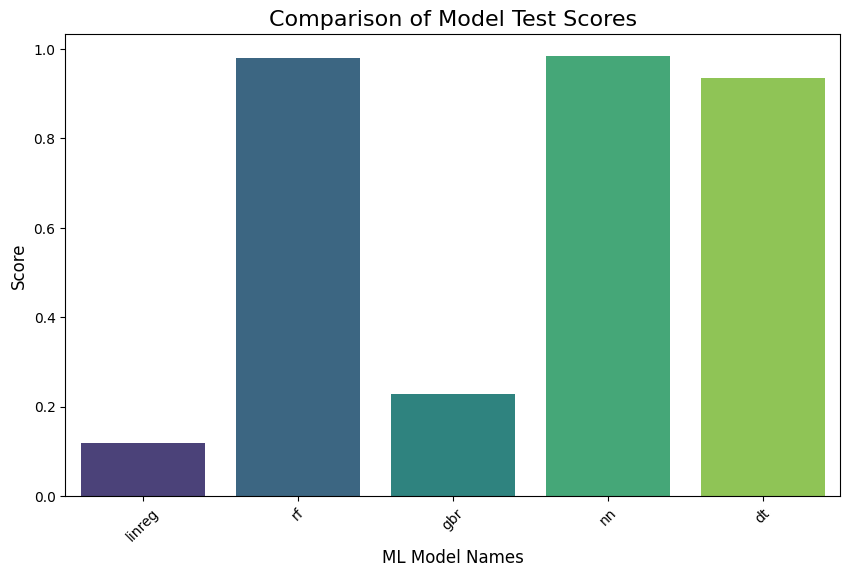

In [39]:
# Create a bar plot to compare the models
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=scores, palette='viridis')
plt.xlabel('ML Model Names', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Model Test Scores', fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### Best Model Selection:

In this case, the model represented by the green bar on the far right (labeled "nn" for neural network) has the highest score, almost reaching 1.0, which suggests it performs the best among all models considered in the chart. This indicates that the neural network model has likely captured the patterns in the data better than the other models. However, it's crucial to consider other factors such as overfitting and the complexity of the model before finalizing the decision. It would be wise to review the training score and ensure that there isn't a significant discrepancy between the training and testing performance which could indicate overfitting.

### Conclusion

The conclusion of your document on data mining, particularly focusing on machine learning algorithms, highlights the evaluation and selection of various models for predicting flight delays. The analysis covered several models, including linear regression, random forest, gradient boosting machines (XGBoost, LightGBM), neural networks and deep learning, and decision tree regression.

Among these, the Neural Network model showcased the best performance, with an R-squared value of 0.99 and low error metrics, suggesting excellent predictive performance and strong generalization to unseen data. The document emphasizes the importance of considering overfitting and the complexity of the model before finalizing the decision on the best model.